In [1]:
!pip install pyspark
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=b83d3fe2290b65b779a76f3833101a8300548f96bcaeb64952d11b0733586c78
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.1 MB/s eta 0:00:00
time: 351 µs (started: 2023-06-17 20:51:02 +00:00)


In [2]:
from pyspark.sql import SparkSession

time: 60.3 ms (started: 2023-06-17 20:51:02 +00:00)


In [3]:
spark = SparkSession.builder.appName('test').getOrCreate()


time: 11.5 s (started: 2023-06-17 20:51:02 +00:00)


In [4]:
spark

time: 1.85 s (started: 2023-06-17 20:51:13 +00:00)


In [5]:
from pyspark.sql.functions import to_timestamp,col,lit,coalesce,concat,unix_timestamp
from pyspark.sql.types import StructType,StructField, IntegerType, FloatType, StringType, DateType,TimestampType,DoubleType
Myschema = StructType([
StructField('Station', StringType(),True),
StructField('Date/Time', TimestampType(),True),
StructField('Air Dew Point', IntegerType(),True),
StructField('Air Temperature (OC)', IntegerType(),True),
StructField('Humidity %', IntegerType(),True),
StructField('Manual Present Weather', StringType(),True),
StructField('Cloud Type', StringType(),True),
StructField('Clouds Cover (Okta)', IntegerType(),True),
StructField('Cloud Cover %', StringType(),True),
StructField('Wind Direction (Degrees)', IntegerType(),True),
StructField('Wind Speed (MPS)', IntegerType(),True),
StructField('Wind Type', StringType(),True)])
df = spark.read.csv("/content/Ghor El Safi  02-01-2017 ---  30-01-2023.csv",header=True,schema=Myschema)

time: 4.91 s (started: 2023-06-17 20:51:15 +00:00)


In [6]:
df.show()

+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|     Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|
+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|Ghor El Safi|2017-01-02 06:00:00|            6|                  10|        75|                  null|   cumulus|                  3|           38|                    null|               0|     calm|
|Ghor El Safi|2017-01-02 12:00:00|            7|                  20|        42|                  null|   cumulus|                  1|           13|                    null|               0|     c

In [7]:
df.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Manual Present Weather: string (nullable = true)
 |-- Cloud Type: string (nullable = true)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: string (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Wind Type: string (nullable = true)

time: 10.9 ms (started: 2023-06-17 20:51:29 +00:00)


In [8]:
df.count()

6959

time: 2.08 s (started: 2023-06-17 20:51:29 +00:00)


In [9]:
df.dropDuplicates(['Air Dew Point']).count()

27

time: 2.68 s (started: 2023-06-17 20:51:31 +00:00)


In [10]:
df.dropDuplicates(['Air Dew Point'])

DataFrame[Station: string, Date/Time: timestamp, Air Dew Point: int, Air Temperature (OC): int, Humidity %: int, Manual Present Weather: string, Cloud Type: string, Clouds Cover (Okta): int, Cloud Cover %: string, Wind Direction (Degrees): int, Wind Speed (MPS): int, Wind Type: string]

time: 68.5 ms (started: 2023-06-17 20:51:34 +00:00)


In [11]:
df.count()

6959

time: 945 ms (started: 2023-06-17 20:51:34 +00:00)


In [12]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 6073,
 'Air Temperature (OC)': 105,
 'Humidity %': 6073,
 'Manual Present Weather': 6492,
 'Cloud Type': 6514,
 'Clouds Cover (Okta)': 6515,
 'Cloud Cover %': 0,
 'Wind Direction (Degrees)': 2292,
 'Wind Speed (MPS)': 3,
 'Wind Type': 1}

time: 9.66 s (started: 2023-06-17 20:51:35 +00:00)


In [13]:
import pyspark.sql.functions as F
df.select('Air Dew Point').withColumn('isNull_c',F.col('Air Dew Point').isNull()).where('isNull_c = True').count()

6073

time: 1.18 s (started: 2023-06-17 20:51:44 +00:00)


In [14]:
for x in df.columns:
  df.groupBy(x).count().show()

+------------+-----+
|     Station|count|
+------------+-----+
|Ghor El Safi| 6959|
+------------+-----+

+-------------------+-----+
|          Date/Time|count|
+-------------------+-----+
|2017-05-06 15:00:00|    1|
|2017-06-15 06:00:00|    1|
|2017-10-19 03:00:00|    1|
|2017-12-06 06:00:00|    1|
|2017-12-22 06:00:00|    1|
|2018-10-14 12:00:00|    1|
|2019-01-17 18:00:00|    1|
|2019-02-01 18:00:00|    1|
|2019-06-18 00:00:00|    1|
|2019-12-12 06:00:00|    1|
|2020-01-21 12:00:00|    1|
|2020-07-13 00:00:00|    1|
|2021-03-11 18:00:00|    1|
|2021-04-02 18:00:00|    1|
|2021-04-27 15:00:00|    1|
|2021-05-21 18:00:00|    1|
|2021-07-12 12:00:00|    1|
|2021-07-18 15:00:00|    1|
|2021-07-20 00:00:00|    1|
|2021-09-16 21:00:00|    1|
+-------------------+-----+
only showing top 20 rows

+-------------+-----+
|Air Dew Point|count|
+-------------+-----+
|           12|   58|
|           22|   41|
|         null| 6073|
|            1|    1|
|           13|   69|
|            6|   17

In [15]:
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import skewness
df.agg(skewness('Humidity %')).show()
imptr = Imputer(inputCols=['Humidity %'],outputCols=['Humidity %']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+--------------------+
|skewness(Humidity %)|
+--------------------+
| 0.19840996654871146|
+--------------------+

time: 1.76 s (started: 2023-06-17 20:51:55 +00:00)


In [16]:
df.select('Humidity %').withColumn('isNull_c',F.col('Humidity %').isNull()).where('isNull_c = True').count()

0

time: 359 ms (started: 2023-06-17 20:51:56 +00:00)


In [17]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 6073,
 'Air Temperature (OC)': 105,
 'Humidity %': 0,
 'Manual Present Weather': 6492,
 'Cloud Type': 6514,
 'Clouds Cover (Okta)': 6515,
 'Cloud Cover %': 0,
 'Wind Direction (Degrees)': 2292,
 'Wind Speed (MPS)': 3,
 'Wind Type': 1}

time: 3.12 s (started: 2023-06-17 20:51:57 +00:00)


In [18]:
df.agg(skewness('Air Temperature (OC)')).show()
imptr = Imputer(inputCols=['Air Temperature (OC)'],outputCols=['Air Temperature (OC)']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+------------------------------+
|skewness(Air Temperature (OC))|
+------------------------------+
|          -0.09973970160133881|
+------------------------------+

time: 743 ms (started: 2023-06-17 20:52:00 +00:00)


In [19]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 6073,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 6492,
 'Cloud Type': 6514,
 'Clouds Cover (Okta)': 6515,
 'Cloud Cover %': 0,
 'Wind Direction (Degrees)': 2292,
 'Wind Speed (MPS)': 3,
 'Wind Type': 1}

time: 4.17 s (started: 2023-06-17 20:52:01 +00:00)


In [20]:
df.agg(skewness('Air Temperature (OC)')).show()
imptr = Imputer(inputCols=['Air Dew Point'],outputCols=['Air Dew Point']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+------------------------------+
|skewness(Air Temperature (OC))|
+------------------------------+
|          -0.10022646925757173|
+------------------------------+

time: 934 ms (started: 2023-06-17 20:52:05 +00:00)


In [21]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 6492,
 'Cloud Type': 6514,
 'Clouds Cover (Okta)': 6515,
 'Cloud Cover %': 0,
 'Wind Direction (Degrees)': 2292,
 'Wind Speed (MPS)': 3,
 'Wind Type': 1}

time: 2.67 s (started: 2023-06-17 20:52:06 +00:00)


In [22]:
df.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Manual Present Weather: string (nullable = true)
 |-- Cloud Type: string (nullable = true)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: string (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Wind Type: string (nullable = true)

time: 6.47 ms (started: 2023-06-17 20:52:08 +00:00)


In [23]:
df.agg(skewness('Wind Speed (MPS)')).show()
imptr = Imputer(inputCols=['Wind Speed (MPS)'],outputCols=['Wind Speed (MPS)']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+--------------------------+
|skewness(Wind Speed (MPS))|
+--------------------------+
|         3.615934104106076|
+--------------------------+

time: 648 ms (started: 2023-06-17 20:52:09 +00:00)


In [24]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 6492,
 'Cloud Type': 6514,
 'Clouds Cover (Okta)': 6515,
 'Cloud Cover %': 0,
 'Wind Direction (Degrees)': 2292,
 'Wind Speed (MPS)': 0,
 'Wind Type': 1}

time: 2.51 s (started: 2023-06-17 20:52:09 +00:00)


In [25]:
df.agg(skewness('Wind Direction (Degrees)')).show()
imptr = Imputer(inputCols=['Wind Direction (Degrees)'],outputCols=['Wind Direction (Degrees)']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+----------------------------------+
|skewness(Wind Direction (Degrees))|
+----------------------------------+
|              -0.18937980167861224|
+----------------------------------+

time: 612 ms (started: 2023-06-17 20:52:12 +00:00)


In [26]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 6492,
 'Cloud Type': 6514,
 'Clouds Cover (Okta)': 6515,
 'Cloud Cover %': 0,
 'Wind Direction (Degrees)': 0,
 'Wind Speed (MPS)': 0,
 'Wind Type': 1}

time: 2.39 s (started: 2023-06-17 20:52:12 +00:00)


In [27]:
df.agg(skewness('Clouds Cover (Okta)')).show()
imptr = Imputer(inputCols=['Clouds Cover (Okta)'],outputCols=['Clouds Cover (Okta)']).setStrategy('median') # can also be 'median' and so on

df = imptr.fit(df).transform(df)

+-----------------------------+
|skewness(Clouds Cover (Okta))|
+-----------------------------+
|           0.5940628747260863|
+-----------------------------+

time: 652 ms (started: 2023-06-17 20:52:15 +00:00)


In [28]:
df.agg(F.mode("Wind Type")).collect()

[Row(mode(Wind Type)='normal')]

time: 942 ms (started: 2023-06-17 20:52:15 +00:00)


In [29]:
df = df.fillna('normal','Wind Type')
df.show(5)

+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|     Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|
+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|Ghor El Safi|2017-01-02 06:00:00|            6|                  10|        75|                  null|   cumulus|                  3|           38|                     230|               0|     calm|
|Ghor El Safi|2017-01-02 12:00:00|            7|                  20|        42|                  null|   cumulus|                  1|           13|                     230|               0|     c

In [30]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 6492,
 'Cloud Type': 6514,
 'Clouds Cover (Okta)': 0,
 'Cloud Cover %': 0,
 'Wind Direction (Degrees)': 0,
 'Wind Speed (MPS)': 0,
 'Wind Type': 0}

time: 3.31 s (started: 2023-06-17 20:52:17 +00:00)


In [31]:
df.agg(F.mode("Cloud Type")).collect()
df = df.fillna('cumulus','Cloud Type')
df.show(5)

+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|     Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|
+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|Ghor El Safi|2017-01-02 06:00:00|            6|                  10|        75|                  null|   cumulus|                  3|           38|                     230|               0|     calm|
|Ghor El Safi|2017-01-02 12:00:00|            7|                  20|        42|                  null|   cumulus|                  1|           13|                     230|               0|     c

In [32]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 6492,
 'Cloud Type': 0,
 'Clouds Cover (Okta)': 0,
 'Cloud Cover %': 0,
 'Wind Direction (Degrees)': 0,
 'Wind Speed (MPS)': 0,
 'Wind Type': 0}

time: 2.25 s (started: 2023-06-17 20:52:21 +00:00)


In [33]:
df.agg(F.mode("Manual Present Weather")).collect()
df = df.fillna('Haze','Manual Present Weather')
df.show(5)

+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|     Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|
+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+
|Ghor El Safi|2017-01-02 06:00:00|            6|                  10|        75|                  Haze|   cumulus|                  3|           38|                     230|               0|     calm|
|Ghor El Safi|2017-01-02 12:00:00|            7|                  20|        42|                  Haze|   cumulus|                  1|           13|                     230|               0|     c

In [34]:
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'Station': 0,
 'Date/Time': 0,
 'Air Dew Point': 0,
 'Air Temperature (OC)': 0,
 'Humidity %': 0,
 'Manual Present Weather': 0,
 'Cloud Type': 0,
 'Clouds Cover (Okta)': 0,
 'Cloud Cover %': 0,
 'Wind Direction (Degrees)': 0,
 'Wind Speed (MPS)': 0,
 'Wind Type': 0}

time: 2.12 s (started: 2023-06-17 20:52:23 +00:00)


In [35]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Manual Present Weather", outputCol="Manual Present Weather (1)")
df = indexer.fit(df).transform(df)
df.show(5)

+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+
|     Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|Manual Present Weather (1)|
+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+
|Ghor El Safi|2017-01-02 06:00:00|            6|                  10|        75|                  Haze|   cumulus|                  3|           38|                     230|               0|     calm|                       0.0|
|Ghor El Safi|2017-01-02 12:00:00|            7|                  20|        42|        

In [36]:
df.groupBy("Manual Present Weather").count().show()

+----------------------+-----+
|Manual Present Weather|count|
+----------------------+-----+
|  Dust or sand rais...|    1|
|  Widespread dust i...|    9|
|  Drizzle, not free...|    8|
|                  Mist|   17|
|                  Haze| 6921|
|  Rain, not freezin...|    3|
+----------------------+-----+

time: 330 ms (started: 2023-06-17 20:52:27 +00:00)


In [37]:
df.groupBy("Manual Present Weather (1)").count().show()

+--------------------------+-----+
|Manual Present Weather (1)|count|
+--------------------------+-----+
|                       0.0| 6921|
|                       1.0|   17|
|                       4.0|    3|
|                       3.0|    8|
|                       2.0|    9|
|                       5.0|    1|
+--------------------------+-----+

time: 344 ms (started: 2023-06-17 20:52:27 +00:00)


In [38]:
df.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Manual Present Weather: string (nullable = false)
 |-- Cloud Type: string (nullable = false)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: string (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Wind Type: string (nullable = false)
 |-- Manual Present Weather (1): double (nullable = false)

time: 6.11 ms (started: 2023-06-17 20:52:28 +00:00)


In [39]:
indexer = StringIndexer(inputCol="Cloud Type", outputCol="Cloud Type (1)")
df = indexer.fit(df).transform(df)
df.show(5)

+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+--------------+
|     Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|Manual Present Weather (1)|Cloud Type (1)|
+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+--------------+
|Ghor El Safi|2017-01-02 06:00:00|            6|                  10|        75|                  Haze|   cumulus|                  3|           38|                     230|               0|     calm|                       0.0|           0.0|
|Ghor El Safi|2017-01-02 12:

In [40]:
df.groupBy("Cloud Type").count().show()

+------------+-----+
|  Cloud Type|count|
+------------+-----+
|     cumulus| 6816|
|cumulonimbus|    1|
|      cirrus|  117|
|cirrostratus|    1|
| altocumulus|   24|
+------------+-----+

time: 196 ms (started: 2023-06-17 20:52:29 +00:00)


In [41]:
df.groupBy("Cloud Type (1)").count().show()

+--------------+-----+
|Cloud Type (1)|count|
+--------------+-----+
|           0.0| 6816|
|           1.0|  117|
|           4.0|    1|
|           3.0|    1|
|           2.0|   24|
+--------------+-----+

time: 605 ms (started: 2023-06-17 20:52:29 +00:00)


In [42]:
from pyspark.sql.types import IntegerType
df = df.withColumn("Cloud Cover %", df["Cloud Cover %"].cast(IntegerType()))

time: 46.6 ms (started: 2023-06-17 20:52:30 +00:00)


In [43]:
df.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Manual Present Weather: string (nullable = false)
 |-- Cloud Type: string (nullable = false)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: integer (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Wind Type: string (nullable = false)
 |-- Manual Present Weather (1): double (nullable = false)
 |-- Cloud Type (1): double (nullable = false)

time: 15.7 ms (started: 2023-06-17 20:52:30 +00:00)


In [44]:
indexer = StringIndexer(inputCol="Wind Type", outputCol="Wind Type (1)")
df = indexer.fit(df).transform(df)
df.show(5)

+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+--------------+-------------+
|     Station|          Date/Time|Air Dew Point|Air Temperature (OC)|Humidity %|Manual Present Weather|Cloud Type|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Wind Type|Manual Present Weather (1)|Cloud Type (1)|Wind Type (1)|
+------------+-------------------+-------------+--------------------+----------+----------------------+----------+-------------------+-------------+------------------------+----------------+---------+--------------------------+--------------+-------------+
|Ghor El Safi|2017-01-02 06:00:00|            6|                  10|        75|                  Haze|   cumulus|                  3|           38|                     230|               0|     calm|                       0.0|  

In [45]:
df.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Manual Present Weather: string (nullable = false)
 |-- Cloud Type: string (nullable = false)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: integer (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Wind Type: string (nullable = false)
 |-- Manual Present Weather (1): double (nullable = false)
 |-- Cloud Type (1): double (nullable = false)
 |-- Wind Type (1): double (nullable = false)

time: 4.21 ms (started: 2023-06-17 20:52:31 +00:00)


In [46]:
df_dropped = df.drop(*['Station','Manual Present Weather','Cloud Type','Wind Type'])

time: 22 ms (started: 2023-06-17 20:52:31 +00:00)


In [47]:
df_dropped.printSchema()

root
 |-- Date/Time: timestamp (nullable = true)
 |-- Air Dew Point: integer (nullable = true)
 |-- Air Temperature (OC): integer (nullable = true)
 |-- Humidity %: integer (nullable = true)
 |-- Clouds Cover (Okta): integer (nullable = true)
 |-- Cloud Cover %: integer (nullable = true)
 |-- Wind Direction (Degrees): integer (nullable = true)
 |-- Wind Speed (MPS): integer (nullable = true)
 |-- Manual Present Weather (1): double (nullable = false)
 |-- Cloud Type (1): double (nullable = false)
 |-- Wind Type (1): double (nullable = false)

time: 3.67 ms (started: 2023-06-17 20:52:31 +00:00)


/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
<ipython-input-48-8958dd657422>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_panda.corr(), cmap="Greens", annot=True,fmt='.2g')


<Axes: >

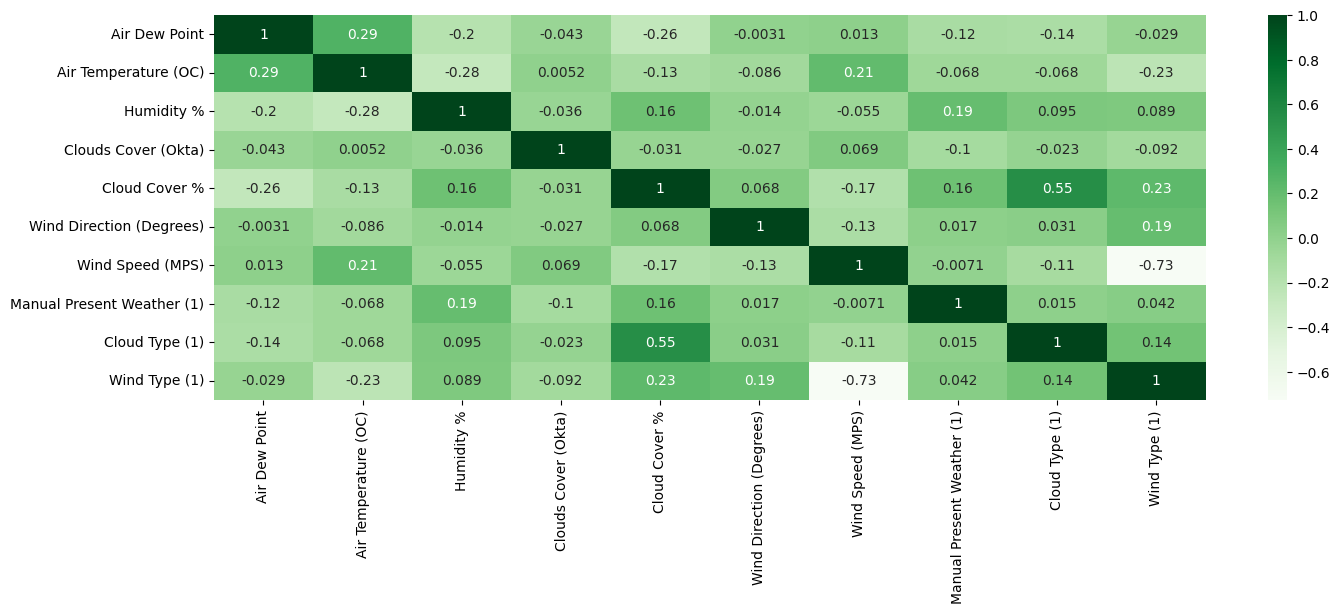

time: 3.41 s (started: 2023-06-17 20:52:31 +00:00)


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

df_panda = df_dropped.toPandas()
plt.figure(figsize=(16,5))
sns.heatmap(df_panda.corr(), cmap="Greens", annot=True,fmt='.2g')

In [49]:
df_panda.describe()

,Air Dew Point,Air Temperature (OC),Humidity %,Clouds Cover (Okta),Cloud Cover %,Wind Direction (Degrees),Wind Speed (MPS),Manual Present Weather (1),Cloud Type (1),Wind Type (1)
count,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000
mean,14.962495,27.047277,51.953585,2.974565,2.091249,201.661158,1.690042,0.010921,0.024716,0.329214
std,1.854557,7.923711,5.254654,0.257260,8.551747,102.887457,1.626015,0.168336,0.183287,0.469962
min,-6.000000,6.000000,12.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,21.000000,52.000000,3.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,27.000000,52.000000,3.000000,0.000000,230.000000,2.000000,0.000000,0.000000,0.000000
75%,15.000000,33.000000,52.000000,3.000000,0.000000,250.000000,3.000000,0.000000,0.000000,1.000000
max,25.000000,50.000000,97.000000,6.000000,75.000000,360.000000,38.000000,5.000000,4.000000,1.000000


time: 66.6 ms (started: 2023-06-17 20:52:34 +00:00)


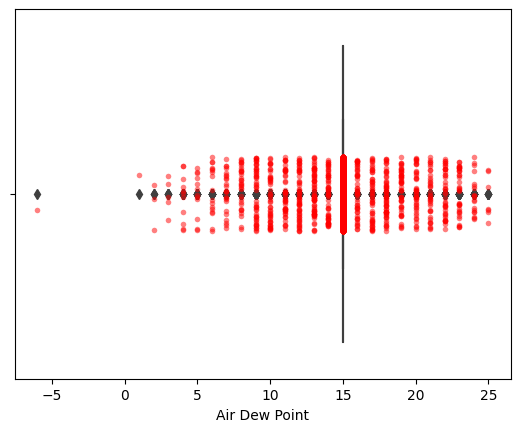



Air Dew Point




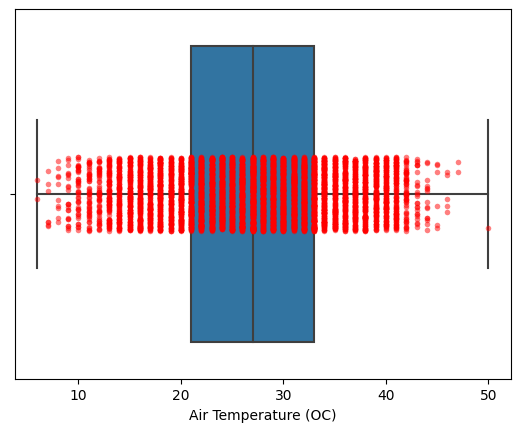



Air Temperature (OC)




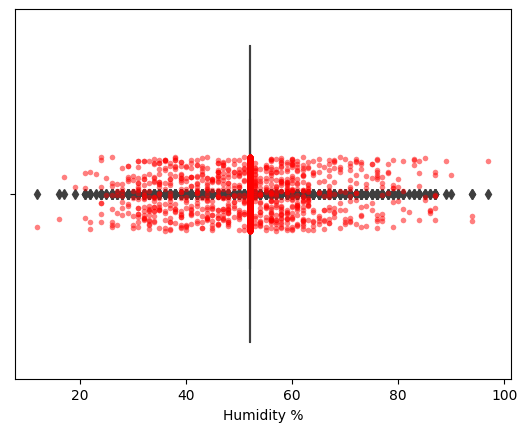



Humidity %




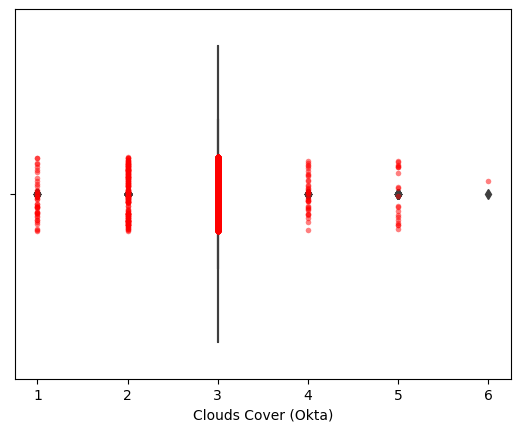



Clouds Cover (Okta)




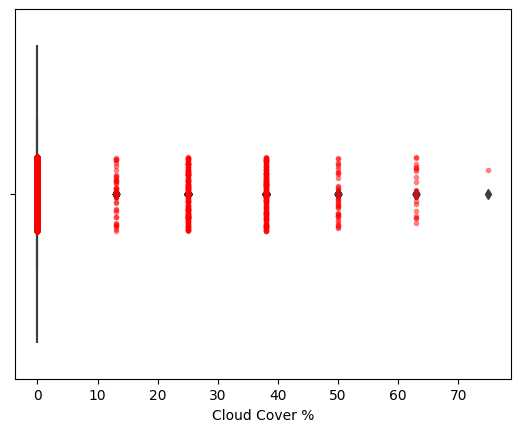



Cloud Cover %




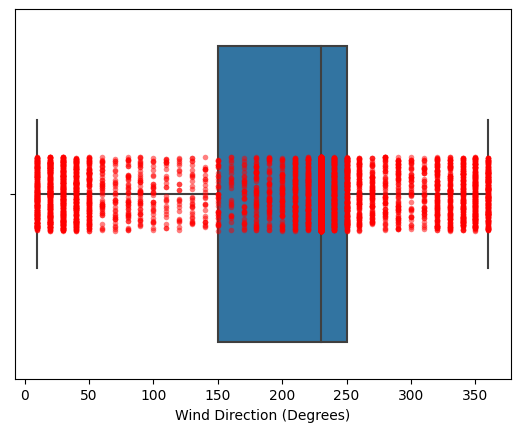



Wind Direction (Degrees)




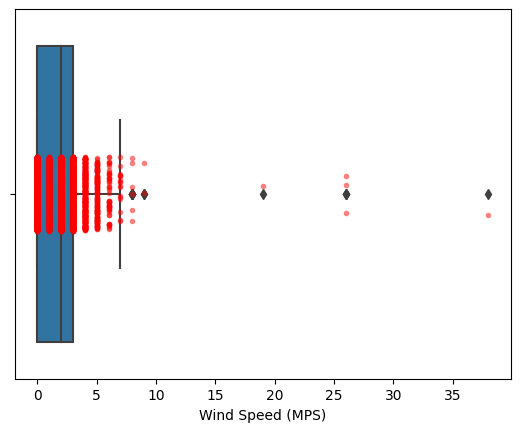



Wind Speed (MPS)




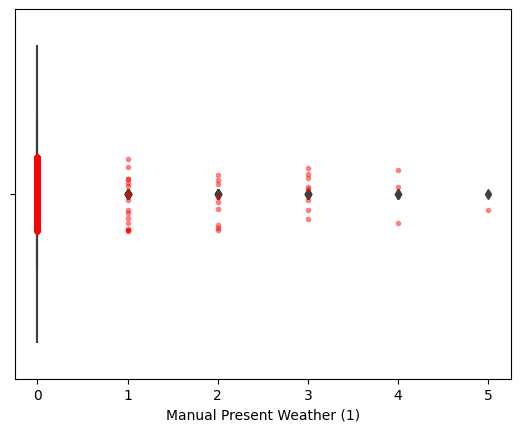



Manual Present Weather (1)




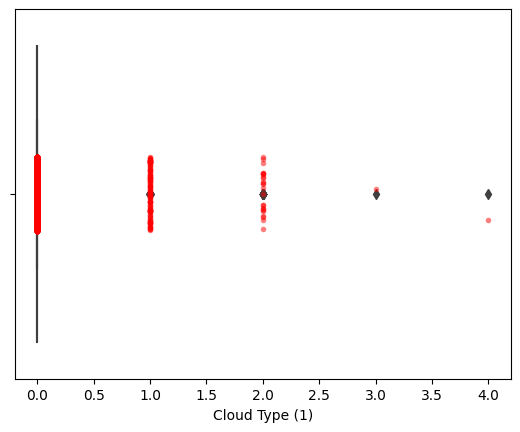



Cloud Type (1)




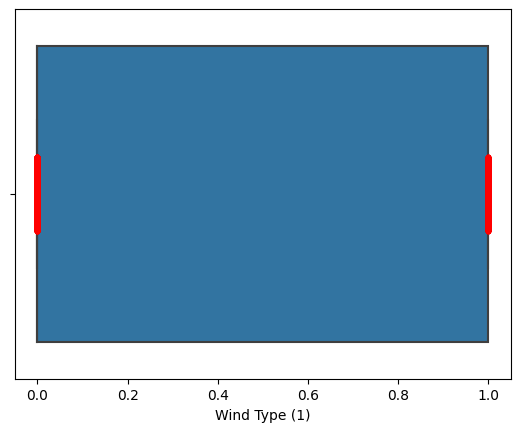



Wind Type (1)


time: 2.23 s (started: 2023-06-17 20:52:34 +00:00)


In [50]:
for x in df_panda.drop('Date/Time',axis=1).columns:
  sns.boxplot(data=df_panda, x= df_panda[x])
  sns.stripplot(x=df_panda[x], color='red', size=4, alpha=0.5)
  plt.show()

  print('\n')
  print(x)
  print('\n')

  plt.show()

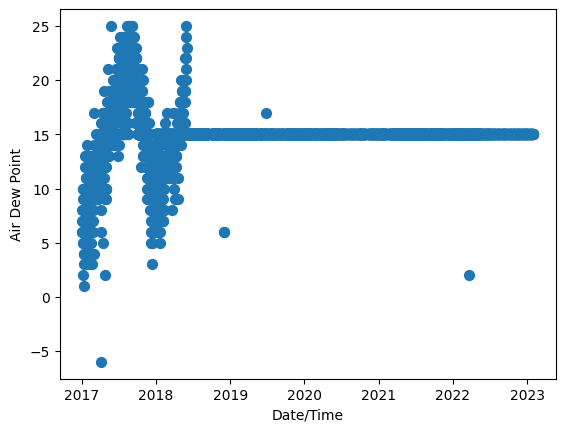

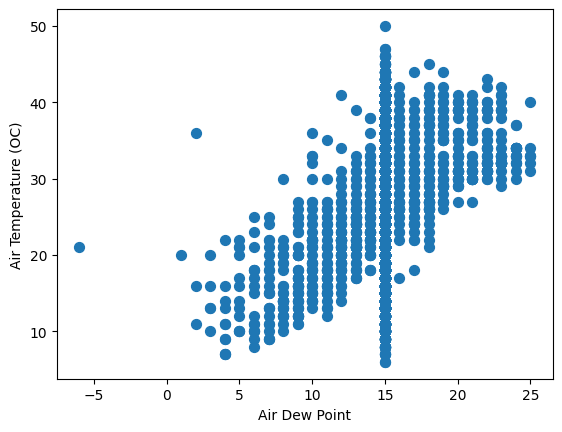

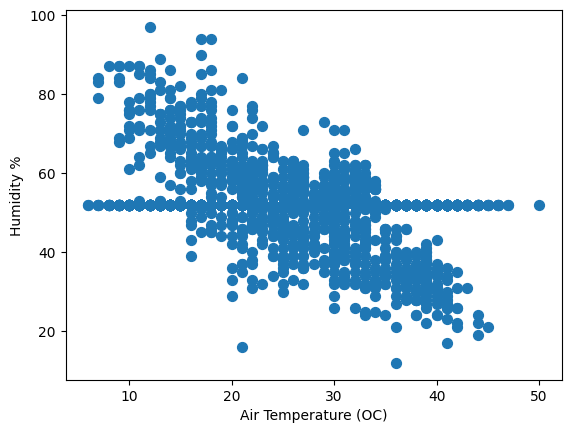

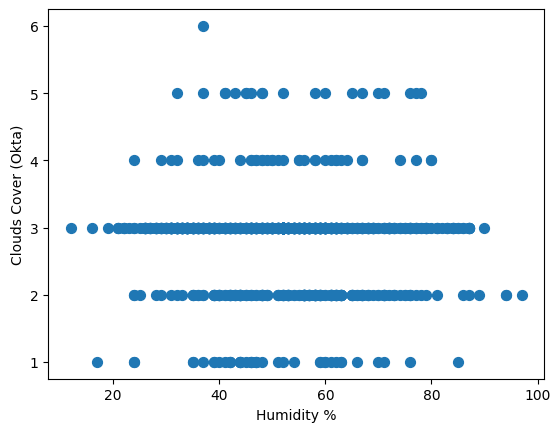

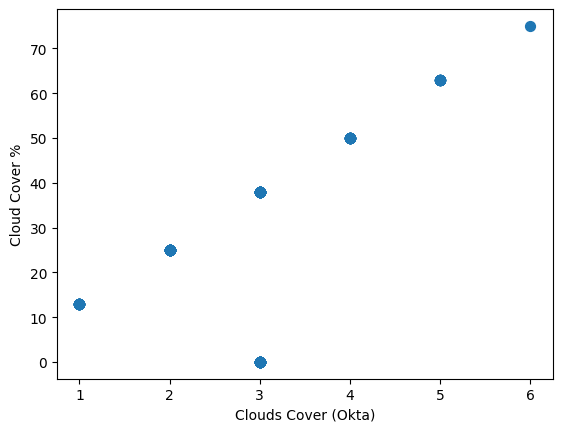

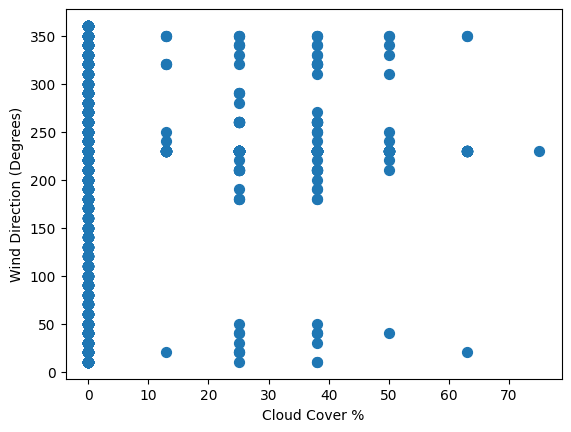

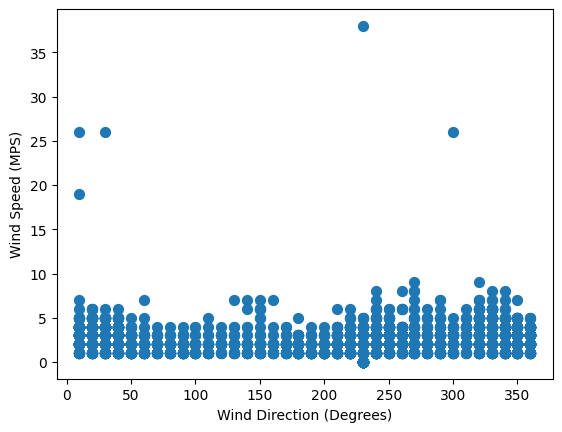

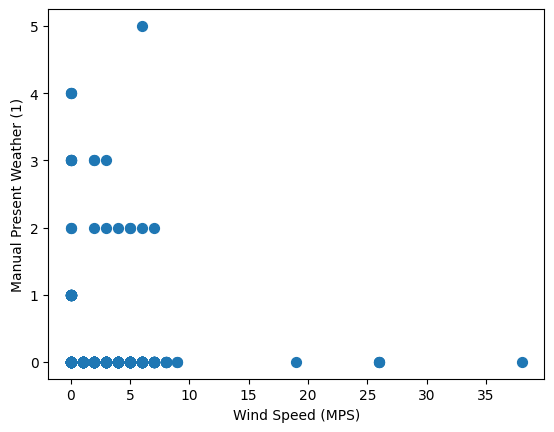

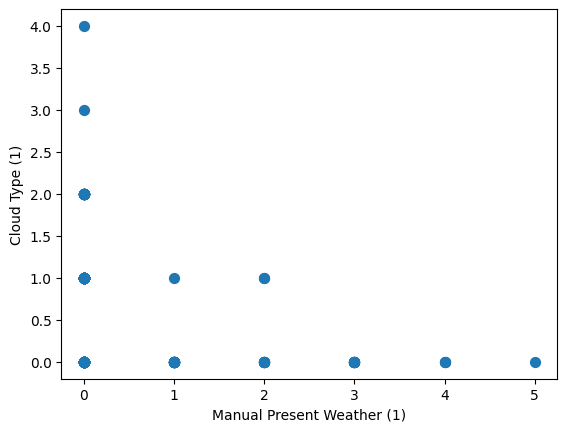

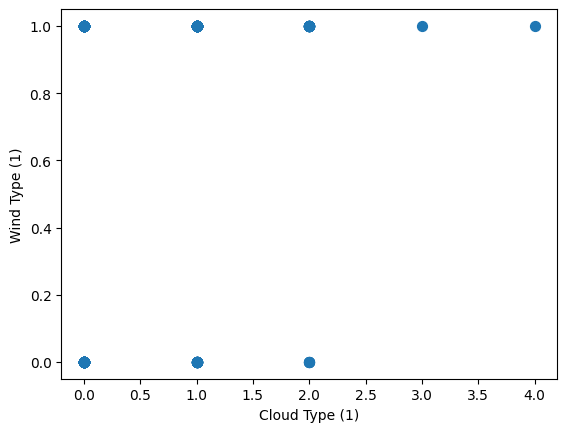

time: 2.85 s (started: 2023-06-17 20:52:37 +00:00)


In [51]:
for x in range(df_panda.shape[1]):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  scatter = ax.scatter(df_panda.iloc[:,x],df_panda.iloc[:,x+1],s=50)

  ax.set_xlabel(df_panda.columns[x])
  ax.set_ylabel(df_panda.columns[x+1])

  if(x==df_panda.shape[1]-2):
    break

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Date/Time




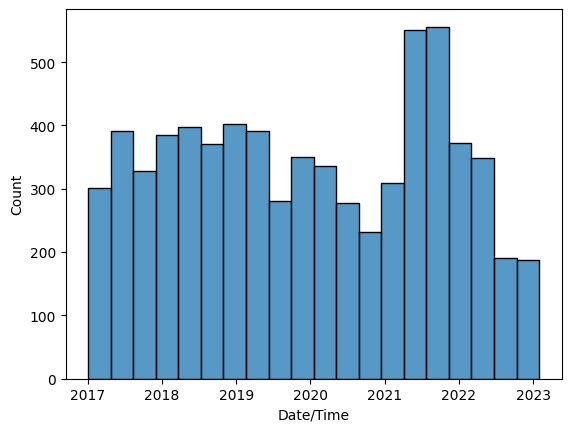

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Air Dew Point




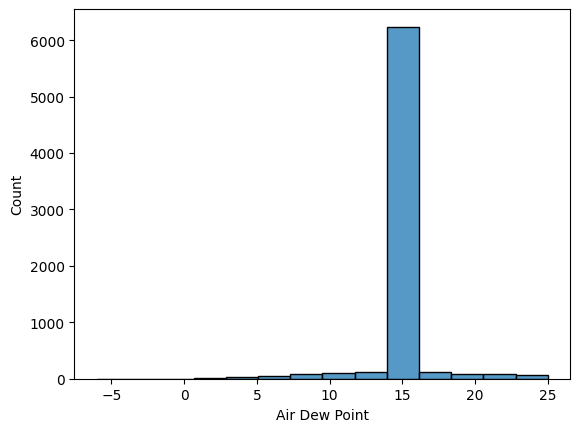

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Air Temperature (OC)




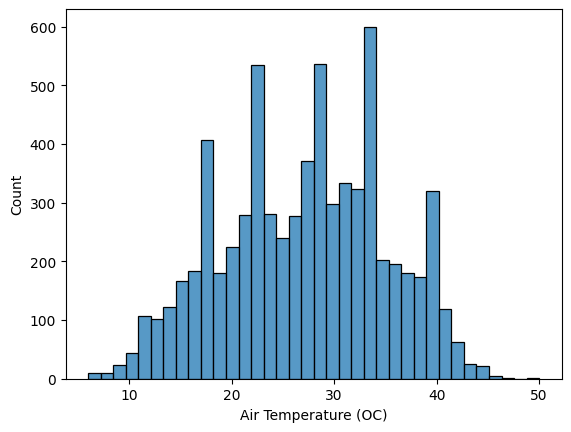

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Humidity %




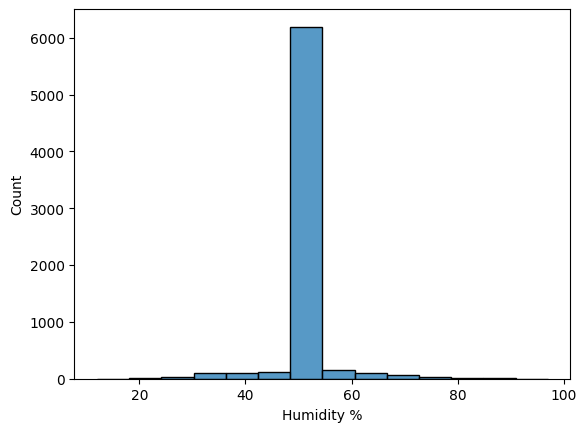

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Clouds Cover (Okta)




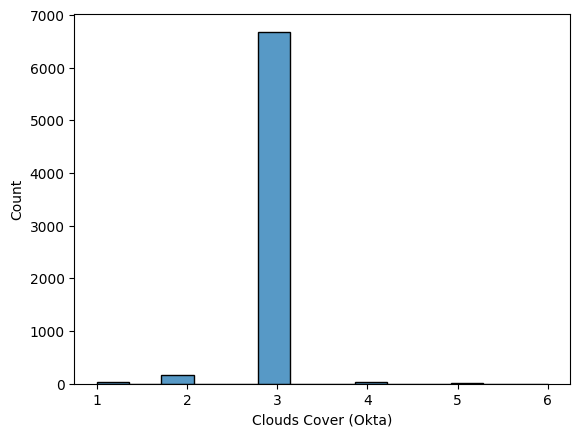

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Cloud Cover %




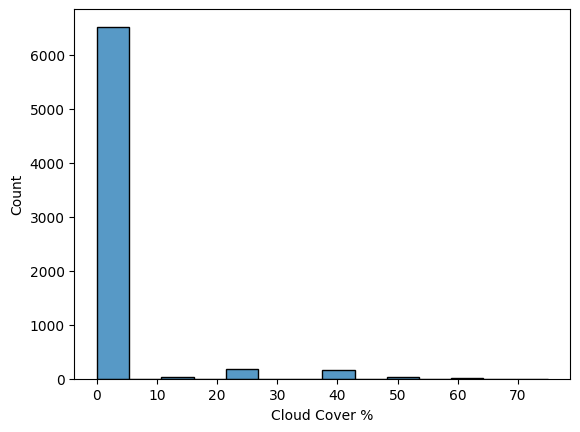

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Wind Direction (Degrees)




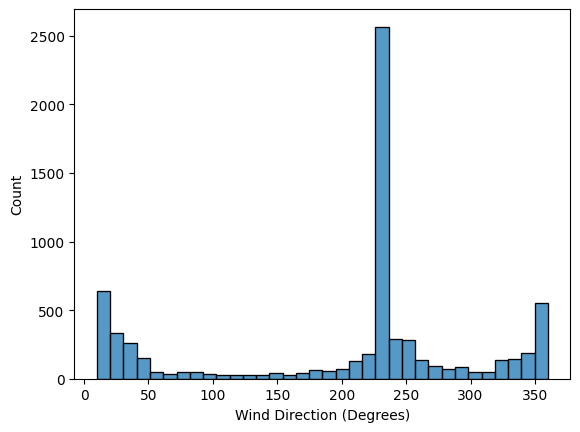

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Wind Speed (MPS)




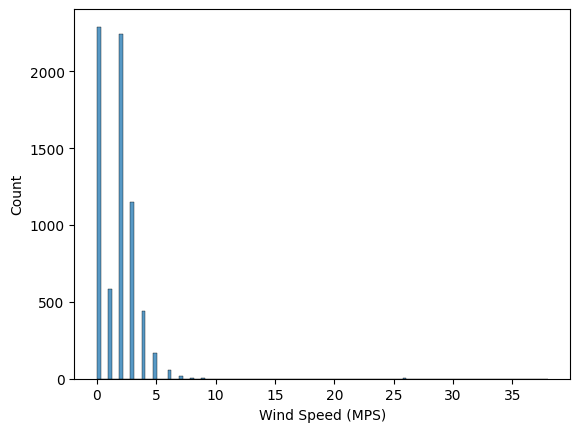

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Manual Present Weather (1)




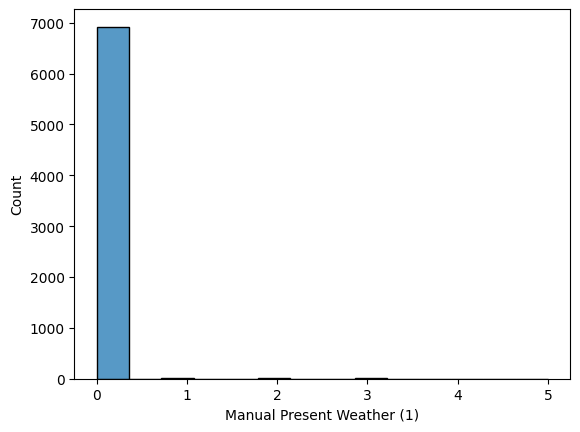

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Cloud Type (1)




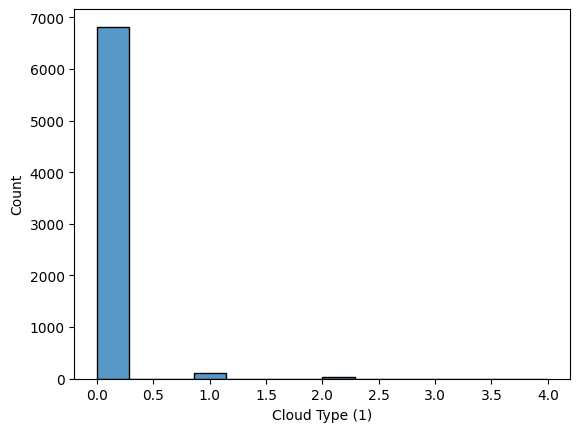

<ipython-input-52-0eb482587663>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_panda[x],palette = 'hls')




Wind Type (1)




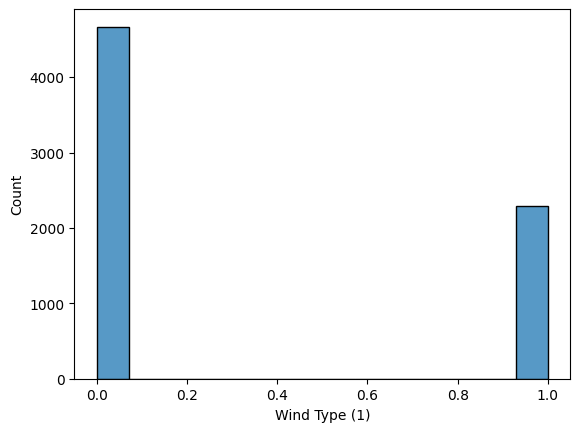

time: 3.25 s (started: 2023-06-17 20:52:39 +00:00)


In [52]:
for x in df_panda.columns:
  sns.histplot(df_panda[x],palette = 'hls')

  print('\n')
  print(x)
  print('\n')

  plt.show()

In [53]:
split_date= F.split(df_dropped['Date/Time'], ' ')
df_dropped= df_dropped.withColumn('Date', split_date.getItem(0))
df_dropped= df_dropped.withColumn('Hours', split_date.getItem(1))


time: 49.2 ms (started: 2023-06-17 20:52:43 +00:00)


In [54]:
df_dropped2 = df_dropped.drop(*['Date/Time'])

time: 16.1 ms (started: 2023-06-17 20:52:43 +00:00)


In [55]:
df_dropped2.show()

+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+----------+--------+
|Air Dew Point|Air Temperature (OC)|Humidity %|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Manual Present Weather (1)|Cloud Type (1)|Wind Type (1)|      Date|   Hours|
+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+----------+--------+
|            6|                  10|        75|                  3|           38|                     230|               0|                       0.0|           0.0|          1.0|2017-01-02|06:00:00|
|            7|                  20|        42|                  1|           13|                     230|               0|                       0.0|           0.0|          1.0|2017-01-02|12:00:00|


In [56]:
split_date= F.split(df_dropped2['Date'], '-')
df_dropped2 = df_dropped2.withColumn('Year', split_date.getItem(0))
df_dropped2 = df_dropped2.withColumn('Month', split_date.getItem(1))
df_dropped2 = df_dropped2.withColumn('Day', split_date.getItem(2))

time: 79 ms (started: 2023-06-17 20:52:43 +00:00)


In [57]:
df_dropped3 = df_dropped2.drop('Date')

time: 23.2 ms (started: 2023-06-17 20:52:43 +00:00)


In [58]:
df_dropped3.show()

+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+--------+----+-----+---+
|Air Dew Point|Air Temperature (OC)|Humidity %|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Manual Present Weather (1)|Cloud Type (1)|Wind Type (1)|   Hours|Year|Month|Day|
+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+--------+----+-----+---+
|            6|                  10|        75|                  3|           38|                     230|               0|                       0.0|           0.0|          1.0|06:00:00|2017|   01| 02|
|            7|                  20|        42|                  1|           13|                     230|               0|                       0.0|           0.0|          1.0|12:00

In [59]:
split_date= F.split(df_dropped3['Hours'], ':')
df_dropped3 = df_dropped3.withColumn('Hours', split_date.getItem(0))

time: 41.4 ms (started: 2023-06-17 20:52:44 +00:00)


In [60]:
df_dropped3.show()

+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+-----+----+-----+---+
|Air Dew Point|Air Temperature (OC)|Humidity %|Clouds Cover (Okta)|Cloud Cover %|Wind Direction (Degrees)|Wind Speed (MPS)|Manual Present Weather (1)|Cloud Type (1)|Wind Type (1)|Hours|Year|Month|Day|
+-------------+--------------------+----------+-------------------+-------------+------------------------+----------------+--------------------------+--------------+-------------+-----+----+-----+---+
|            6|                  10|        75|                  3|           38|                     230|               0|                       0.0|           0.0|          1.0|   06|2017|   01| 02|
|            7|                  20|        42|                  1|           13|                     230|               0|                       0.0|           0.0|          1.0|   12|2017|   01|

In [61]:
df_group = df_dropped3.groupBy('Day','Month','Year').agg({'Air Dew Point':'mean','Air Temperature (OC)':'mean','Humidity %':'mean','Clouds Cover (Okta)':'mean','Cloud Cover %':'mean','Wind Direction (Degrees)':'mean',"Wind Speed (MPS)":'mean',"Manual Present Weather (1)":'mode',"Cloud Type (1)":'mode',"Wind Type (1)":'mode'})


time: 93.2 ms (started: 2023-06-17 20:52:44 +00:00)


In [62]:
df_group.count()

2135

time: 936 ms (started: 2023-06-17 20:52:44 +00:00)


In [63]:
df_group.show(10)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+
| 01|   01|2018|                        218.0|                     2.6|                 0.0|                  1.4|                             0.0|                     16.8|           54.8|              10.0|              12.6|                0.0|
| 01|   

In [64]:
df_group.sort(['Year','Month','Day']).show(10)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+
| 02|   01|2017|                        230.0|                     2.0|                 0.0|                  0.0|                             0.0|                     15.0|           58.5|              25.5|               6.5|                1.0|
| 03|   

In [65]:
from pyspark.sql.types import IntegerType
#df_group = df_group.withColumn("avg(Cloud Cover %)", df_group["avg(Cloud Cover %)"].cast(IntegerType()))

time: 855 µs (started: 2023-06-17 20:52:49 +00:00)


In [66]:
for x in df_group.columns:

    df_group = df_group.withColumn(x, df_group[x].cast(IntegerType()))

time: 276 ms (started: 2023-06-17 20:52:49 +00:00)


In [67]:
df_group.printSchema()

root
 |-- Day: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- avg(Wind Direction (Degrees)): integer (nullable = true)
 |-- avg(Clouds Cover (Okta)): integer (nullable = true)
 |-- mode(Cloud Type (1)): integer (nullable = true)
 |-- avg(Wind Speed (MPS)): integer (nullable = true)
 |-- mode(Manual Present Weather (1)): integer (nullable = true)
 |-- avg(Air Temperature (OC)): integer (nullable = true)
 |-- avg(Humidity %): integer (nullable = true)
 |-- avg(Cloud Cover %): integer (nullable = true)
 |-- avg(Air Dew Point): integer (nullable = true)
 |-- mode(Wind Type (1)): integer (nullable = true)

time: 10.3 ms (started: 2023-06-17 20:52:49 +00:00)


In [68]:
df_group.show(10)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+
|  1|    1|2018|                          218|                       2|                   0|                    1|                               0|                       16|             54|                10|                12|                  0|
|  1|   

In [69]:
df_pandas_grouped = df_group.toPandas()

time: 1.09 s (started: 2023-06-17 20:52:50 +00:00)


In [70]:
for x in df_group.columns:
  df_group.groupBy(x).count().show()

+---+-----+
|Day|count|
+---+-----+
| 31|   39|
| 28|   72|
| 27|   71|
| 26|   71|
| 12|   72|
| 22|   66|
|  1|   68|
| 13|   73|
|  6|   72|
| 16|   72|
|  3|   70|
| 20|   71|
|  5|   73|
| 19|   69|
| 15|   71|
|  9|   72|
| 17|   69|
|  4|   69|
|  8|   71|
| 23|   69|
+---+-----+
only showing top 20 rows

+-----+-----+
|Month|count|
+-----+-----+
|   12|  183|
|    1|  213|
|    6|  177|
|    3|  186|
|    5|  181|
|    9|  161|
|    4|  178|
|    8|  172|
|    7|  177|
|   10|  177|
|   11|  167|
|    2|  163|
+-----+-----+

+----+-----+
|Year|count|
+----+-----+
|2018|  353|
|2023|   28|
|2022|  341|
|2019|  352|
|2020|  343|
|2017|  364|
|2021|  354|
+----+-----+

+-----------------------------+-----+
|avg(Wind Direction (Degrees))|count|
+-----------------------------+-----+
|                          148|    3|
|                          243|   13|
|                           85|    3|
|                          251|    2|
|                          137|    2|
|            

In [71]:
for x in df_dropped.columns:
  df_dropped.groupBy(x).count().show()

+-------------------+-----+
|          Date/Time|count|
+-------------------+-----+
|2017-05-06 15:00:00|    1|
|2017-06-15 06:00:00|    1|
|2017-10-19 03:00:00|    1|
|2017-12-06 06:00:00|    1|
|2017-12-22 06:00:00|    1|
|2018-10-14 12:00:00|    1|
|2019-01-17 18:00:00|    1|
|2019-02-01 18:00:00|    1|
|2019-06-18 00:00:00|    1|
|2019-12-12 06:00:00|    1|
|2020-01-21 12:00:00|    1|
|2020-07-13 00:00:00|    1|
|2021-03-11 18:00:00|    1|
|2021-04-02 18:00:00|    1|
|2021-04-27 15:00:00|    1|
|2021-05-21 18:00:00|    1|
|2021-07-12 12:00:00|    1|
|2021-07-18 15:00:00|    1|
|2021-07-20 00:00:00|    1|
|2021-09-16 21:00:00|    1|
+-------------------+-----+
only showing top 20 rows

+-------------+-----+
|Air Dew Point|count|
+-------------+-----+
|           12|   58|
|           22|   41|
|            1|    1|
|           13|   69|
|            6|   17|
|           16|   50|
|            3|    5|
|           20|   43|
|            5|   12|
|           19|   49|
|           15| 

In [72]:
df_pandas_group_dropped= df_pandas_grouped.drop(['Day','Year','Month'],axis=1)

time: 2.88 ms (started: 2023-06-17 20:53:06 +00:00)


In [73]:
df_pandas_grouped.describe()

,Day,Month,Year,avg(Wind Direction (Degrees)),avg(Clouds Cover (Okta)),mode(Cloud Type (1)),avg(Wind Speed (MPS)),mode(Manual Present Weather (1)),avg(Air Temperature (OC)),avg(Humidity %),avg(Cloud Cover %),avg(Air Dew Point),mode(Wind Type (1))
count,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000
mean,15.720375,6.390164,2019.517564,201.059016,2.924122,0.027166,1.419204,0.005152,26.880562,51.978923,2.651522,14.863232,0.212178
std,8.769197,3.496148,1.747014,72.389872,0.302835,0.203558,1.247267,0.135089,7.425561,3.621376,8.192241,2.041976,0.408946
min,1.000000,1.000000,2017.000000,10.000000,1.000000,0.000000,0.000000,0.000000,9.000000,27.000000,0.000000,2.000000,0.000000
25%,8.000000,3.000000,2018.000000,160.000000,3.000000,0.000000,1.000000,0.000000,21.000000,52.000000,0.000000,15.000000,0.000000
50%,16.000000,6.000000,2019.000000,223.000000,3.000000,0.000000,1.000000,0.000000,27.000000,52.000000,0.000000,15.000000,0.000000
75%,23.000000,9.000000,2021.000000,246.000000,3.000000,0.000000,2.000000,0.000000,34.000000,52.000000,0.000000,15.000000,0.000000
max,31.000000,12.000000,2023.000000,360.000000,5.000000,2.000000,26.000000,5.000000,46.000000,83.000000,69.000000,24.000000,1.000000


time: 64.9 ms (started: 2023-06-17 20:53:06 +00:00)




avg(Wind Direction (Degrees))




<ipython-input-74-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')


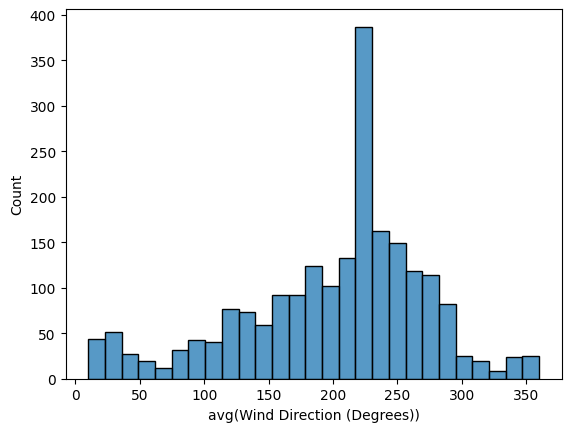

<ipython-input-74-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Clouds Cover (Okta))




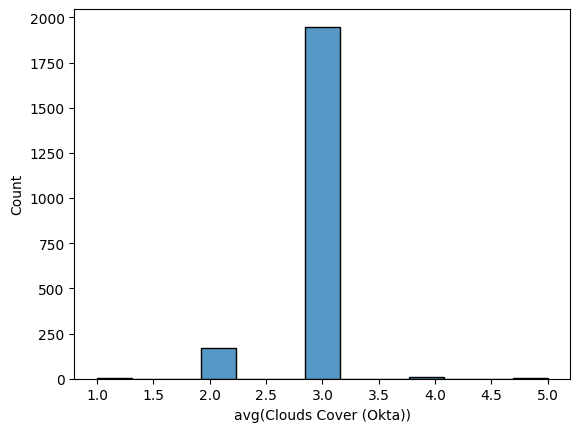

<ipython-input-74-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




mode(Cloud Type (1))




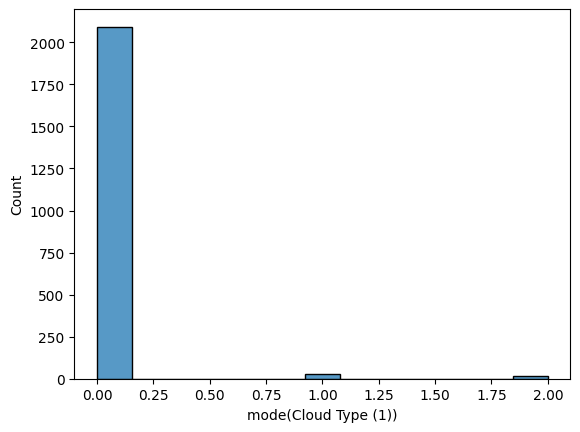

<ipython-input-74-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Wind Speed (MPS))




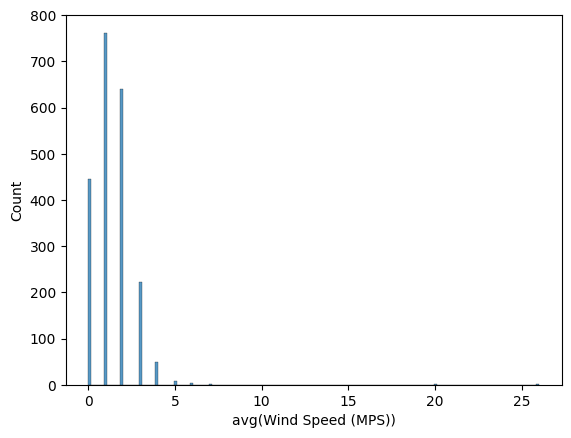

<ipython-input-74-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




mode(Manual Present Weather (1))




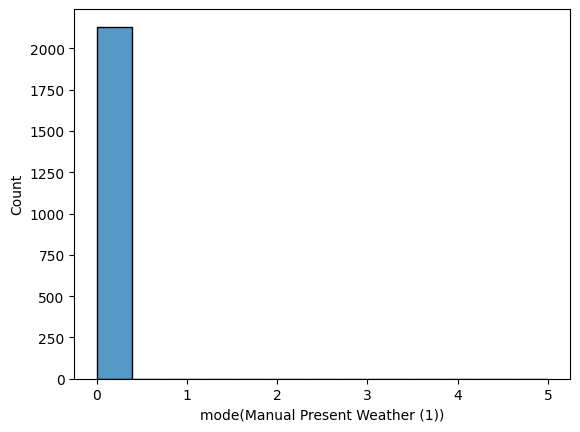

<ipython-input-74-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Air Temperature (OC))




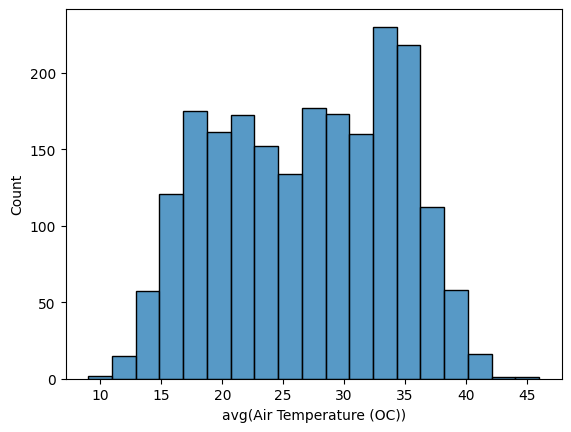

<ipython-input-74-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Humidity %)




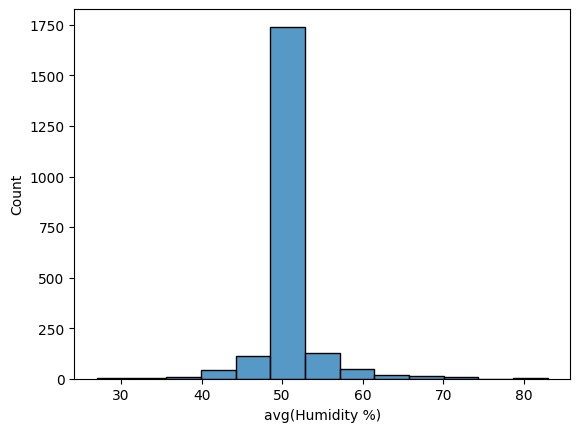

<ipython-input-74-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Cloud Cover %)




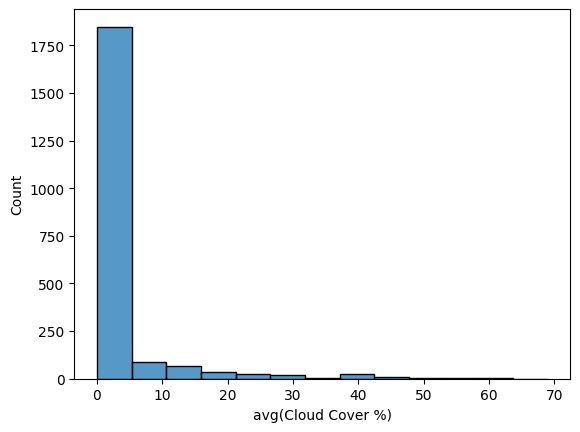

<ipython-input-74-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




avg(Air Dew Point)




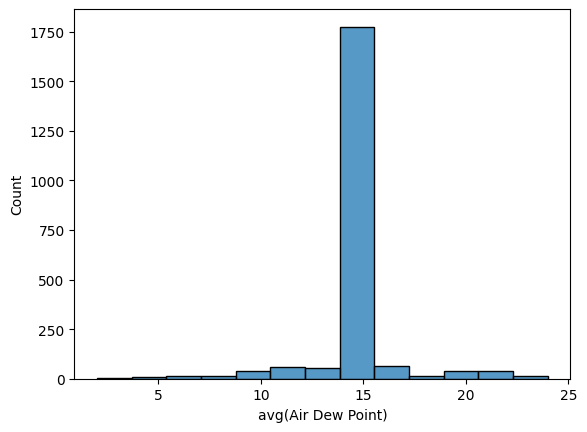

<ipython-input-74-e047ceb29be4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')




mode(Wind Type (1))




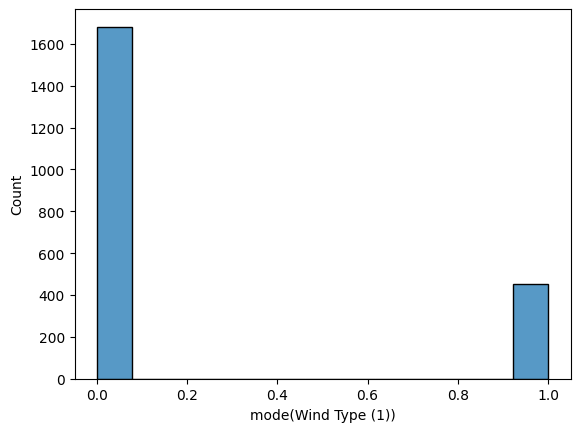

time: 2.79 s (started: 2023-06-17 20:53:06 +00:00)


In [74]:
for x in df_pandas_group_dropped.columns:
  sns.histplot(df_pandas_group_dropped[x],palette = 'hls')

  print('\n')
  print(x)
  print('\n')

  plt.show()

<Axes: >

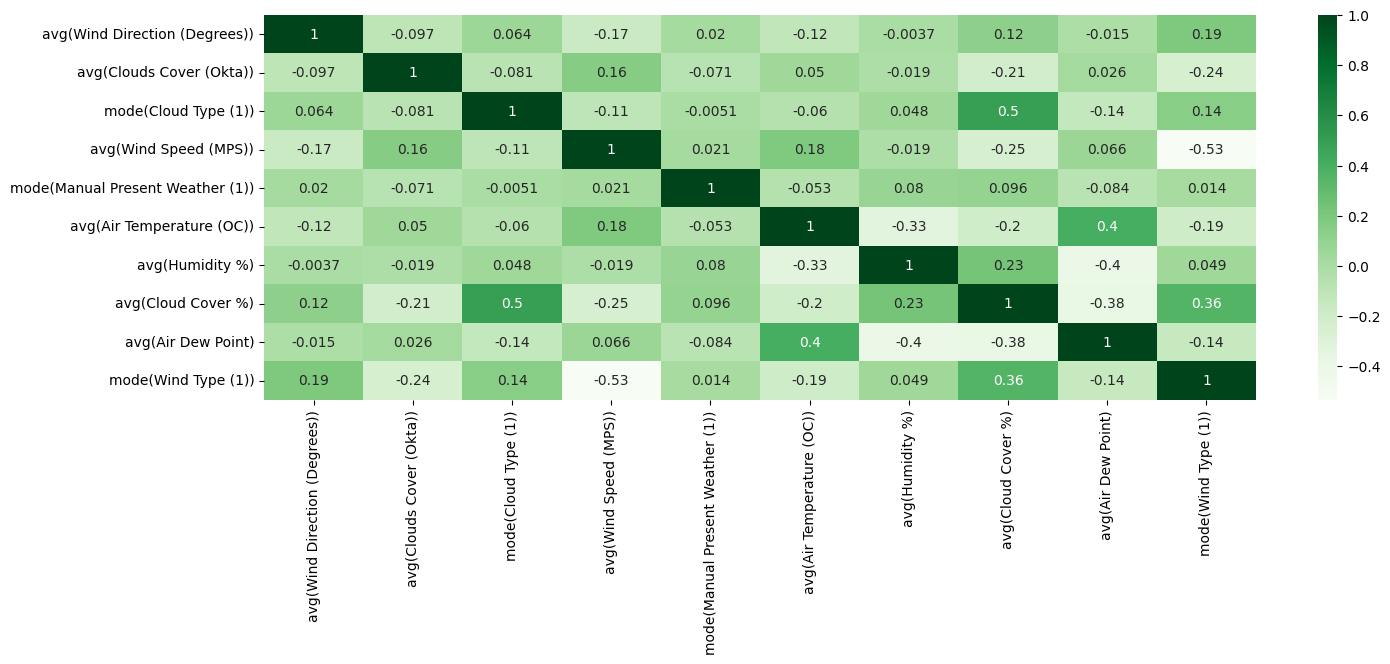

time: 942 ms (started: 2023-06-17 20:53:09 +00:00)


In [75]:
plt.figure(figsize=(16,5))
sns.heatmap(df_pandas_group_dropped.corr(), cmap="Greens", annot=True,fmt='.2g')

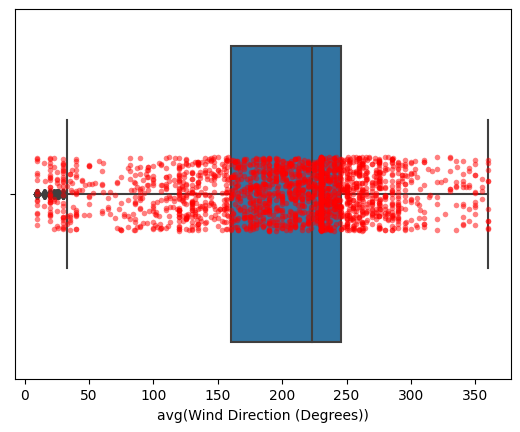



avg(Wind Direction (Degrees))




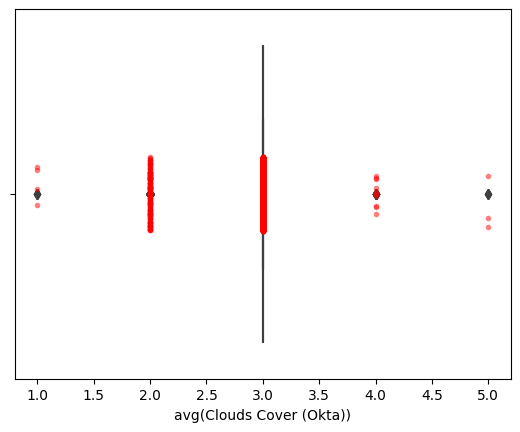



avg(Clouds Cover (Okta))




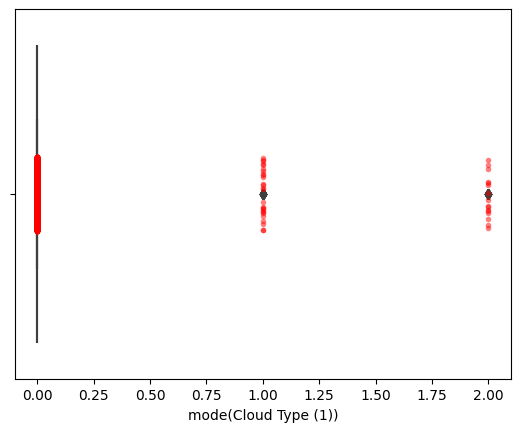



mode(Cloud Type (1))




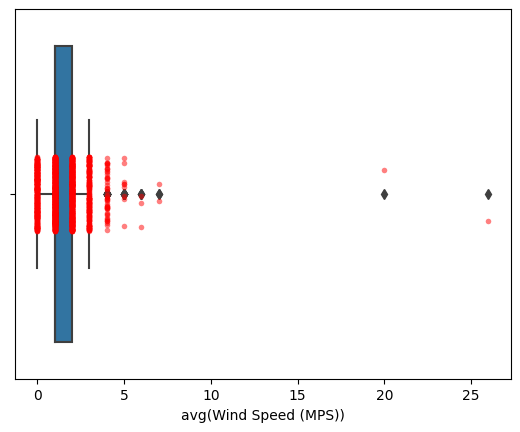



avg(Wind Speed (MPS))




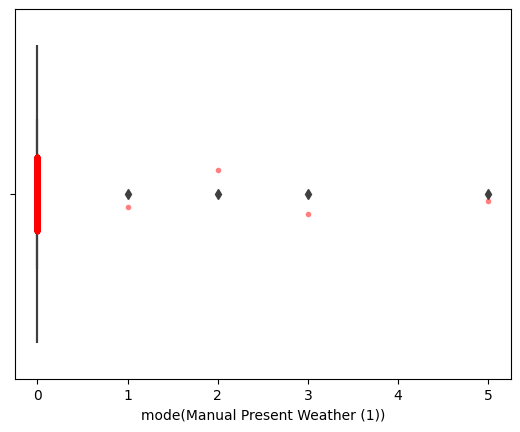



mode(Manual Present Weather (1))




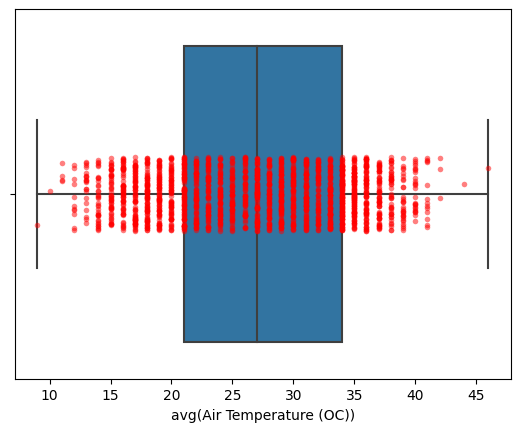



avg(Air Temperature (OC))




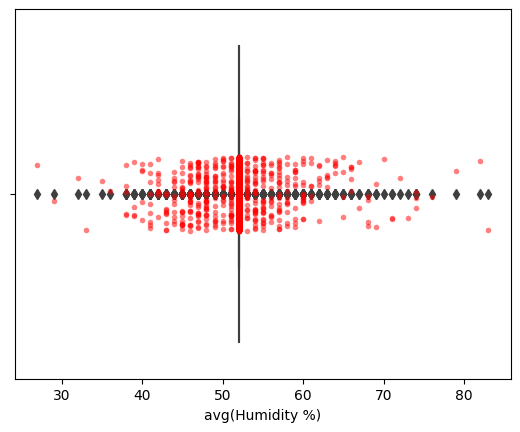



avg(Humidity %)




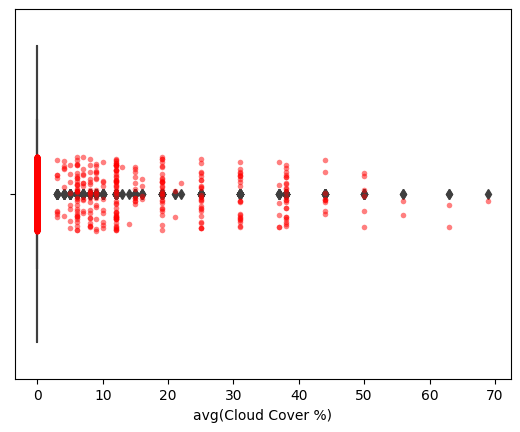



avg(Cloud Cover %)




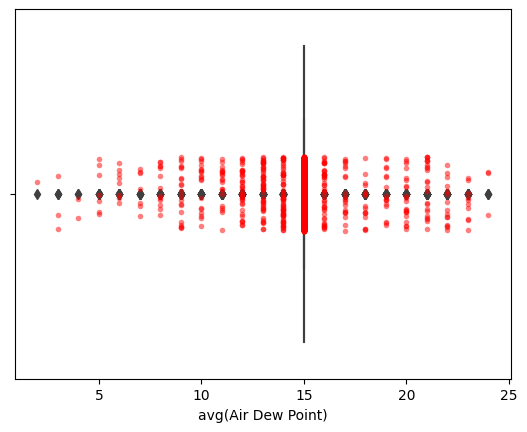



avg(Air Dew Point)




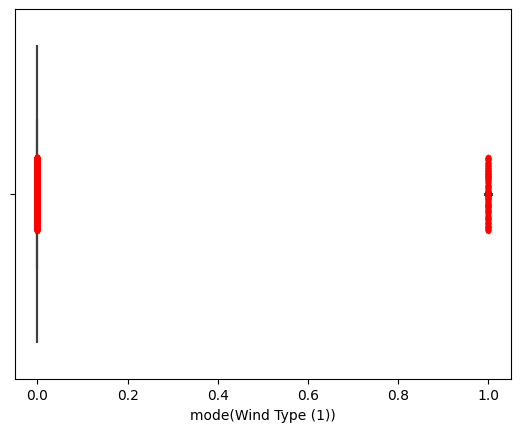



mode(Wind Type (1))


time: 2.48 s (started: 2023-06-17 20:53:10 +00:00)


In [76]:
for x in df_pandas_group_dropped.columns:
  sns.boxplot(data=df_pandas_group_dropped, x= df_pandas_group_dropped[x])
  sns.stripplot(x=df_pandas_group_dropped[x], color='red', size=4, alpha=0.5)
  plt.show()

  print('\n')
  print(x)
  print('\n')

  plt.show()

In [77]:
df_pandas_group_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   avg(Wind Direction (Degrees))     2135 non-null   int32
 1   avg(Clouds Cover (Okta))          2135 non-null   int32
 2   mode(Cloud Type (1))              2135 non-null   int32
 3   avg(Wind Speed (MPS))             2135 non-null   int32
 4   mode(Manual Present Weather (1))  2135 non-null   int32
 5   avg(Air Temperature (OC))         2135 non-null   int32
 6   avg(Humidity %)                   2135 non-null   int32
 7   avg(Cloud Cover %)                2135 non-null   int32
 8   avg(Air Dew Point)                2135 non-null   int32
 9   mode(Wind Type (1))               2135 non-null   int32
dtypes: int32(10)
memory usage: 83.5 KB
time: 17 ms (started: 2023-06-17 20:53:12 +00:00)


In [78]:
df_group.printSchema()

root
 |-- Day: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- avg(Wind Direction (Degrees)): integer (nullable = true)
 |-- avg(Clouds Cover (Okta)): integer (nullable = true)
 |-- mode(Cloud Type (1)): integer (nullable = true)
 |-- avg(Wind Speed (MPS)): integer (nullable = true)
 |-- mode(Manual Present Weather (1)): integer (nullable = true)
 |-- avg(Air Temperature (OC)): integer (nullable = true)
 |-- avg(Humidity %): integer (nullable = true)
 |-- avg(Cloud Cover %): integer (nullable = true)
 |-- avg(Air Dew Point): integer (nullable = true)
 |-- mode(Wind Type (1)): integer (nullable = true)

time: 2.3 ms (started: 2023-06-17 20:53:12 +00:00)


In [79]:
df_group = df_group.withColumn('Season',F.when(F.col('Month').between(3,9),'summer').otherwise("winter"))

time: 60.3 ms (started: 2023-06-17 20:53:12 +00:00)


In [80]:
df_group = df_group.drop('Sesason')

time: 15.2 ms (started: 2023-06-17 20:53:12 +00:00)


In [81]:
df_group.show()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+
|  1|    1|2018|                          218|                       2|                   0|                    1|                               0|                       16|             54|                10|                12|        

In [82]:
Myschema = StructType([
StructField('Year', IntegerType(),True),
StructField('Season', StringType(),True),
StructField('crop', StringType(),True),
StructField('level', DoubleType(),True),])
crop_production = spark.read.csv("/content/Ghor El safi crop production.csv",header=True,schema=Myschema)

time: 68.4 ms (started: 2023-06-17 20:53:15 +00:00)


In [83]:
crop_production.show()

+----+------+---------+--------+
|Year|Season|     crop|   level|
+----+------+---------+--------+
|2017|summer| tomatoes| 58939.6|
|2017|winter| tomatoes| 75470.9|
|2017|summer|Eggplants|  3021.1|
|2017|winter|Eggplants|  2306.4|
|2017|summer|  cabbage|   893.0|
|2017|winter|  cabbage|   764.5|
|2018|summer| tomatoes| 45367.5|
|2018|winter| tomatoes|120710.8|
|2018|summer|Eggplants|   762.4|
|2018|winter|Eggplants|  3959.1|
|2018|summer|  cabbage|     0.0|
|2018|winter|  cabbage|     0.0|
|2019|summer| tomatoes| 17317.6|
|2019|winter| tomatoes| 98611.6|
|2019|summer|Eggplants|   462.3|
|2019|winter|Eggplants|  4194.1|
|2019|summer|  cabbage|     0.0|
|2019|winter|  cabbage|    69.8|
|2020|summer| tomatoes| 25336.8|
|2020|winter| tomatoes| 81196.5|
+----+------+---------+--------+
only showing top 20 rows

time: 410 ms (started: 2023-06-17 20:53:15 +00:00)


In [84]:
df_group.show(10)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+
|  1|    1|2018|                          218|                       2|                   0|                    1|                               0|                       16|             54|                10|                12|        

In [85]:
filters = [df_group.Season == crop_production.Season, df_group.Year == crop_production.Year]

time: 10.2 ms (started: 2023-06-17 20:53:16 +00:00)


In [86]:
crops_weather = df_group.join(crop_production, filters, 'inner').drop(*[crop_production.Season,crop_production.Year])

time: 71.6 ms (started: 2023-06-17 20:53:16 +00:00)


In [87]:
crops_weather.count()

5298

time: 929 ms (started: 2023-06-17 20:53:16 +00:00)


In [88]:
crops_weather.show()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+--------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|     crop|   level|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+--------+
|  1|    1|2018|                          218|                       2|                   0|                    1|                               0|                       16|     

In [89]:
Dict_Null = {col:crops_weather.filter(crops_weather[col].isNull()).count() for col in crops_weather.columns}
Dict_Null

{'Day': 0,
 'Month': 0,
 'Year': 0,
 'avg(Wind Direction (Degrees))': 0,
 'avg(Clouds Cover (Okta))': 0,
 'mode(Cloud Type (1))': 0,
 'avg(Wind Speed (MPS))': 0,
 'mode(Manual Present Weather (1))': 0,
 'avg(Air Temperature (OC))': 0,
 'avg(Humidity %)': 0,
 'avg(Cloud Cover %)': 0,
 'avg(Air Dew Point)': 0,
 'mode(Wind Type (1))': 0,
 'Season': 0,
 'crop': 0,
 'level': 0}

time: 9.53 s (started: 2023-06-17 20:53:18 +00:00)


In [90]:
for x in crops_weather.columns:
  crops_weather.groupBy(x).count().show()

+---+-----+
|Day|count|
+---+-----+
| 31|   96|
| 28|  177|
| 27|  174|
| 26|  177|
| 12|  177|
| 22|  165|
|  1|  171|
| 13|  180|
|  6|  177|
| 16|  177|
|  3|  171|
| 20|  174|
|  5|  180|
| 19|  168|
| 15|  177|
| 17|  171|
|  9|  177|
|  4|  171|
|  8|  177|
| 23|  171|
+---+-----+
only showing top 20 rows

+-----+-----+
|Month|count|
+-----+-----+
|   12|  462|
|    1|  462|
|    6|  441|
|    3|  465|
|    5|  453|
|    9|  405|
|    4|  450|
|    8|  438|
|    7|  444|
|   10|  450|
|   11|  423|
|    2|  405|
+-----+-----+

+----+-----+
|Year|count|
+----+-----+
|2018| 1059|
|2019| 1056|
|2020| 1029|
|2017| 1092|
|2021| 1062|
+----+-----+

+-----------------------------+-----+
|avg(Wind Direction (Degrees))|count|
+-----------------------------+-----+
|                          148|    6|
|                          243|   33|
|                           85|    9|
|                          251|    6|
|                          137|    6|
|                           65|    6|
|

In [91]:
crops_weather_tomato = crops_weather.filter(crops_weather['crop'] == 'tomatoes')

time: 10.8 ms (started: 2023-06-17 20:53:37 +00:00)


In [92]:
crops_weather_tomato.show()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+--------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|    crop|   level|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+--------+
|  1|    1|2018|                          218|                       2|                   0|                    1|                               0|                       16|        

In [93]:
crops_weather_tomato.count()

1766

time: 786 ms (started: 2023-06-17 20:53:38 +00:00)


In [94]:
crops_weather_tomato = crops_weather_tomato.withColumn('Status days(Temp)', (F.when(((F.col('avg(Air Temperature (OC))')) >= 35) | (F.col('avg(Air Temperature (OC))') <= 0), 0)).otherwise(1)) ## 0 is bad and 1 is good

time: 107 ms (started: 2023-06-17 20:53:39 +00:00)


In [95]:
crops_weather_tomato.show()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+--------+-----------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|    crop|   level|Status days(Temp)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+--------+-----------------+
|  1|    1|2018|                          218|                       2|                   0|                    1|             

In [96]:
crops_weather_tomato.groupBy('Status days(Temp)').count().show() ## bad days are 298

+-----------------+-----+
|Status days(Temp)|count|
+-----------------+-----+
|                1| 1468|
|                0|  298|
+-----------------+-----+

time: 965 ms (started: 2023-06-17 20:53:41 +00:00)


In [97]:
bad_days_level_tomatoes = crops_weather_tomato.filter(crops_weather_tomato['Status days(Temp)'] == 0).select('level')

time: 34.4 ms (started: 2023-06-17 20:53:42 +00:00)


In [98]:
Good_days_level_tomatoes = crops_weather_tomato.filter(crops_weather_tomato['Status days(Temp)'] == 1).select('level')

time: 61.8 ms (started: 2023-06-17 20:53:42 +00:00)


In [99]:
bad_days_level_tomatoes.show()

+--------+
|   level|
+--------+
| 45367.5|
| 17317.6|
| 58939.6|
| 17317.6|
| 28635.8|
| 45367.5|
| 45367.5|
| 17317.6|
| 58939.6|
| 58939.6|
| 45367.5|
|120710.8|
| 58939.6|
| 58939.6|
| 58939.6|
| 17317.6|
| 25336.8|
| 58939.6|
| 17317.6|
| 45367.5|
+--------+
only showing top 20 rows

time: 439 ms (started: 2023-06-17 20:53:42 +00:00)


In [100]:
Good_days_level_tomatoes.show()

+--------+
|   level|
+--------+
| 58939.6|
|120710.8|
| 98611.6|
| 17317.6|
| 25336.8|
| 28635.8|
| 98611.6|
| 58939.6|
| 45367.5|
| 17317.6|
|119528.9|
| 28635.8|
| 28635.8|
| 98611.6|
| 25336.8|
| 75470.9|
|120710.8|
| 17317.6|
| 98611.6|
| 28635.8|
+--------+
only showing top 20 rows

time: 642 ms (started: 2023-06-17 20:53:43 +00:00)


In [101]:
crops_weather_egplants = crops_weather.filter(crops_weather['crop'] == 'Eggplants')
crops_weather_egplants = crops_weather_egplants.withColumn('Status days(Temp)', (F.when(((F.col('avg(Air Temperature (OC))')) >= 35) | (F.col('avg(Air Temperature (OC))') <= 10), 0)).otherwise(1)) ## 0 is bad and 1 is good
crops_weather_egplants.show()
crops_weather_egplants.count()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+------+-----------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|     crop| level|Status days(Temp)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+------+-----------------+
|  1|    1|2018|                          218|                       2|                   0|                    1|                

1766

time: 1.26 s (started: 2023-06-17 20:53:44 +00:00)


In [102]:
crops_weather_egplants.groupBy('Status days(Temp)').count().show() #bad days are 300

+-----------------+-----+
|Status days(Temp)|count|
+-----------------+-----+
|                1| 1466|
|                0|  300|
+-----------------+-----+

time: 750 ms (started: 2023-06-17 20:53:45 +00:00)


In [103]:
bad_days_level_eggplants = crops_weather_egplants.filter(crops_weather_egplants['Status days(Temp)'] == 0).select('level')
good_days_level_eggplants = crops_weather_egplants.filter(crops_weather_egplants['Status days(Temp)'] == 1).select('level')
bad_days_level_eggplants.show()
good_days_level_eggplants.show()

+------+
| level|
+------+
| 762.4|
| 462.3|
|3021.1|
| 462.3|
|3691.0|
| 762.4|
| 762.4|
| 462.3|
|3021.1|
|3021.1|
| 762.4|
|3959.1|
|3021.1|
|3021.1|
|3021.1|
| 462.3|
|1705.5|
|3021.1|
| 462.3|
| 762.4|
+------+
only showing top 20 rows

+------+
| level|
+------+
|3021.1|
|3959.1|
|4194.1|
| 462.3|
|1705.5|
|3691.0|
|4194.1|
|3021.1|
| 762.4|
| 462.3|
|6737.3|
|3691.0|
|3691.0|
|4194.1|
|1705.5|
|2306.4|
|3959.1|
| 462.3|
|4194.1|
|3691.0|
+------+
only showing top 20 rows

time: 933 ms (started: 2023-06-17 20:53:46 +00:00)


In [104]:
crops_weather_cabbage = crops_weather.filter(crops_weather['crop'] == 'cabbage')
crops_weather_cabbage = crops_weather_cabbage.withColumn('Status days(Temp)', (F.when(((F.col('avg(Air Temperature (OC))')) >= 27) | (F.col('avg(Air Temperature (OC))') <= -2), 0)).otherwise(1)) ## 0 is bad and 1 is good
crops_weather_cabbage.show()
crops_weather_cabbage.count()

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+-----+-----------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|   crop|level|Status days(Temp)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+-----+-----------------+
|  1|    1|2018|                          218|                       2|                   0|                    1|                         

1766

time: 1.14 s (started: 2023-06-17 20:53:47 +00:00)


In [105]:
crops_weather_cabbage.groupBy('Status days(Temp)').count().show() #bad days are 942

+-----------------+-----+
|Status days(Temp)|count|
+-----------------+-----+
|                1|  824|
|                0|  942|
+-----------------+-----+

time: 776 ms (started: 2023-06-17 20:53:48 +00:00)


In [106]:
bad_days_level_cabbage = crops_weather_cabbage.filter(crops_weather_cabbage['Status days(Temp)'] == 0).select('level')
good_days_level_cabbage = crops_weather_cabbage.filter(crops_weather_cabbage['Status days(Temp)'] == 1).select('level')
bad_days_level_cabbage.show()
good_days_level_cabbage.show()

+-----+
|level|
+-----+
|893.0|
|  0.0|
|  0.0|
| 69.8|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
|893.0|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
|134.5|
|  0.0|
|893.0|
+-----+
only showing top 20 rows

+-----+
|level|
+-----+
|  0.0|
| 69.8|
|  0.0|
|893.0|
|  0.0|
|  0.0|
|  0.0|
| 69.8|
|  0.0|
|764.5|
|  0.0|
| 69.8|
|  0.0|
| 69.8|
|134.5|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
| 69.8|
+-----+
only showing top 20 rows

time: 869 ms (started: 2023-06-17 20:53:48 +00:00)


# **Predictions for tomatoes**

In [107]:
indexer = StringIndexer(inputCol="Season", outputCol="Season (1)")
crops_weather_tomato = indexer.fit(crops_weather_tomato).transform(crops_weather_tomato)
crops_weather_tomato.show(5)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+--------+-----------------+----------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|    crop|   level|Status days(Temp)|Season (1)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+--------+-----------------+----------+
|  1|    1|2018|                          218|                       2|                   0|  

In [108]:
X_column_names = crops_weather_tomato.drop(*['level','crop','Season']).columns
target_colum_name = crops_weather_tomato['level']

time: 26.5 ms (started: 2023-06-17 20:53:51 +00:00)


In [109]:
from pyspark.ml.feature import VectorAssembler
v_asmblr = VectorAssembler(inputCols=X_column_names, outputCol='features')
crops_weather_tomato2 = v_asmblr.transform(crops_weather_tomato)
crops_weather_tomato2.show(3)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+--------+-----------------+----------+--------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|    crop|   level|Status days(Temp)|Season (1)|            features|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+--------+--------+-----------------+----------+--------------------+
|  1|    1|2018|               

In [110]:
final_data = crops_weather_tomato2.select('features','level')
trainset, testset = final_data.randomSplit([0.8,0.2])

time: 89.9 ms (started: 2023-06-17 20:53:52 +00:00)


In [111]:
from pyspark.ml.regression import LinearRegression
model = LinearRegression(featuresCol='features', labelCol='level')
fit = model.fit(trainset)
print(fit.coefficients)
print(fit.intercept)

[17.805462701708436,-601.3630620100713,-2578.5596487166795,6.3770061937208995,-5465.823997961949,-2625.3125918979845,172.81382321105335,756.2850604838139,72.5527971518414,-881.9242836820063,-74.78621871498373,2485.2996953309407,2086.7203626930004,1871.5679620326523,70623.25028944001]
5261936.498169673
time: 5.51 s (started: 2023-06-17 20:53:53 +00:00)


In [112]:
result = fit.evaluate(testset)

time: 1.19 s (started: 2023-06-17 20:53:58 +00:00)


In [113]:
result.r2

0.8044444433220146

time: 13.8 ms (started: 2023-06-17 20:53:59 +00:00)


In [114]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
rf2 = RandomForestRegressor(featuresCol='features', labelCol='level')
fit2 = rf2.fit(trainset)

time: 3.88 s (started: 2023-06-17 20:53:59 +00:00)


In [115]:
pred2 = fit2.transform(testset)
evaluator2 = RegressionEvaluator(labelCol='level',predictionCol='prediction',metricName='r2')
r2_2 = evaluator2.evaluate(pred2)
print(r2_2)

0.9621057689701678
time: 1.16 s (started: 2023-06-17 20:54:03 +00:00)


time: 1.17 s (started: 2023-06-17 20:54:03 +00:00)


# **Predictions for Eggplants**

In [116]:
indexer = StringIndexer(inputCol="Season", outputCol="Season (1)")
crops_weather_egplants = indexer.fit(crops_weather_egplants).transform(crops_weather_egplants)
crops_weather_egplants.show(5)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+------+-----------------+----------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|     crop| level|Status days(Temp)|Season (1)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+------+-----------------+----------+
|  1|    1|2018|                          218|                       2|                   0|     

In [117]:
X_column_names = crops_weather_egplants.drop(*['level','crop','Season']).columns
target_colum_name = crops_weather_egplants['level']

time: 22.3 ms (started: 2023-06-17 20:54:06 +00:00)


In [118]:
v_asmblr = VectorAssembler(inputCols=X_column_names, outputCol='features')
crops_weather_egplants2 = v_asmblr.transform(crops_weather_egplants)
crops_weather_egplants2.show(3)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+------+-----------------+----------+--------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|     crop| level|Status days(Temp)|Season (1)|            features|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+---------+------+-----------------+----------+--------------------+
|  1|    1|2018|                  

In [119]:
final_data = crops_weather_egplants2.select('features','level')
trainset, testset = final_data.randomSplit([0.8,0.2])

time: 78.8 ms (started: 2023-06-17 20:54:07 +00:00)


In [120]:
model = LinearRegression(featuresCol='features', labelCol='level')
fit = model.fit(trainset)
print(fit.coefficients)
print(fit.intercept)

[0.6982292743029295,-12.987303227872031,700.3847056155943,0.42434194918518126,-562.2230180648132,-303.27454721891377,-64.72028577951876,53.744076689278415,-9.25959149849321,-112.276182264135,29.844199214295305,188.2795170225319,365.9381934357309,56.80474006608275,2741.299052900435]
-1407467.7872617187
time: 3.78 s (started: 2023-06-17 20:54:07 +00:00)


In [121]:
result = fit.evaluate(testset)
print('results are')
print(result.r2)

results are
0.7525676856684963
time: 810 ms (started: 2023-06-17 20:54:11 +00:00)


In [122]:
rf = RandomForestRegressor(featuresCol='features', labelCol='level')
fit = rf.fit(trainset)

time: 2.53 s (started: 2023-06-17 20:54:12 +00:00)


In [123]:
pred = fit.transform(testset)
evaluator = RegressionEvaluator(labelCol='level',predictionCol='prediction',metricName='r2')
r = evaluator.evaluate(pred)
print(r)

0.9656544673110767
time: 1.05 s (started: 2023-06-17 20:54:14 +00:00)


# **Predictions for Cabbage**

In [124]:
indexer = StringIndexer(inputCol="Season", outputCol="Season (1)")
crops_weather_cabbage = indexer.fit(crops_weather_cabbage).transform(crops_weather_cabbage)
crops_weather_cabbage.show(5)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+-----+-----------------+----------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|   crop|level|Status days(Temp)|Season (1)|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+-----+-----------------+----------+
|  1|    1|2018|                          218|                       2|                   0|              

In [125]:
X_column_names = crops_weather_cabbage.drop(*['level','crop','Season']).columns
target_colum_name = crops_weather_cabbage['level']

time: 24.7 ms (started: 2023-06-17 20:54:17 +00:00)


In [126]:
v_asmblr = VectorAssembler(inputCols=X_column_names, outputCol='features')
crops_weather_cabbage2 = v_asmblr.transform(crops_weather_cabbage)
crops_weather_cabbage2.show(3)

+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+-----+-----------------+----------+--------------------+
|Day|Month|Year|avg(Wind Direction (Degrees))|avg(Clouds Cover (Okta))|mode(Cloud Type (1))|avg(Wind Speed (MPS))|mode(Manual Present Weather (1))|avg(Air Temperature (OC))|avg(Humidity %)|avg(Cloud Cover %)|avg(Air Dew Point)|mode(Wind Type (1))|Season|   crop|level|Status days(Temp)|Season (1)|            features|
+---+-----+----+-----------------------------+------------------------+--------------------+---------------------+--------------------------------+-------------------------+---------------+------------------+------------------+-------------------+------+-------+-----+-----------------+----------+--------------------+
|  1|    1|2018|                          2

In [127]:
final_data = crops_weather_cabbage2.select('features','level')
trainset, testset = final_data.randomSplit([0.8,0.2])

time: 43.7 ms (started: 2023-06-17 20:54:18 +00:00)


In [128]:
model = LinearRegression(featuresCol='features', labelCol='level')
fit = model.fit(trainset)
print(fit.coefficients)
print(fit.intercept)

[0.3771729450073501,4.773483683258422,-107.17584745074066,0.01276184283690046,-94.18450353524565,-10.25139580724828,-25.74870717117227,-29.706461749123832,-2.012380372322291,-18.793163089150934,11.674887060690416,13.118682422440521,75.77712542774191,-5.697420196429423,5.415529061678087]
217625.07449036153
time: 5.25 s (started: 2023-06-17 20:54:18 +00:00)


In [129]:
result = fit.evaluate(testset)
print('results are')
print(result.r2)

results are
0.6623592208227971
time: 992 ms (started: 2023-06-17 20:54:23 +00:00)


In [130]:
rf3= RandomForestRegressor(featuresCol='features', labelCol='level')
fit3 = rf3.fit(trainset)
pred3 = fit3.transform(testset)
evaluator3 = RegressionEvaluator(labelCol='level',predictionCol='prediction',metricName='r2')
r2_3 = evaluator3.evaluate(pred3)
print(r2_3)

0.9929855181844136
time: 3.45 s (started: 2023-06-17 20:54:24 +00:00)


In [131]:
!df -h .

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   25G   83G  24% /
time: 115 ms (started: 2023-06-17 20:54:28 +00:00)


# **Uploading the data for a power BI visualization**

In [132]:
df_group.write.option("header",True).csv('/content/Ghor El Safi weather.csv')

time: 1.19 s (started: 2023-06-17 20:54:28 +00:00)


In [133]:
crops_weather.write.option("header",True).csv('/content/Ghor El Safi crops_weather.csv')

time: 926 ms (started: 2023-06-17 20:54:29 +00:00)


In [134]:
crops_weather_cabbage.write.option("header",True).csv('/content/Ghor El Safi crops_weather_cabbage.csv')

time: 1.13 s (started: 2023-06-17 20:54:30 +00:00)


In [135]:
crops_weather_egplants.write.option("header",True).csv('/content/Ghor El Safi crops_weather_egplants.csv')

time: 802 ms (started: 2023-06-17 20:54:31 +00:00)


In [136]:
crops_weather_tomato.write.option("header",True).csv('/content/Ghor El Safi crops_weather_tomato.csv')

time: 789 ms (started: 2023-06-17 20:54:32 +00:00)


In [137]:
df.write.option("header",True).csv('/content/Ghor El Safi weather_ungroupped.csv')

time: 543 ms (started: 2023-06-17 20:54:33 +00:00)
